In [ ]:
!pip install datascience

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
import pandas as pd
from datascience import *
import graphviz

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from datascience import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/DS200Labs/Projectdata

bestplayerTree	    Fullmetadata.csv   NewFileforsoccer.csv
bestplayerTree.pdf  FullShotsData.csv


# **Soccer FIFA 2021 Team and Player Dataset**

# **Top 5 Football Leagues Stats of Soccer Player**


-This is Meta Data from all the top 5 European Football Leagues from seasons 2014/15 - 2019/20-

In [ ]:
"""
path1= "/content/drive/My Drive/DS200Labs/Projectdata/Fullmetadata.csv"
allplayer = Table.read_table(path1)
allplayer.show(15)
"""


Source: “Top 5 Football Leagues Stats”


https://www.kaggle.com/datasets/shushrutsharma/top-5-football-leagues?select=Fullmetadata.csv



# **The ranking of a player's goals in each season**

In [ ]:
"""
SalesByGenre = allplayer.select('player_name', 'goals')
SalesByGenre.sort('goals', descending = True)
"""

player_name        | goals
Cristiano Ronaldo  | 48
Lionel Messi       | 43
Luis Suárez        | 40
Zlatan Ibrahimovic | 38
Lionel Messi       | 37
Ciro Immobile      | 36
Lionel Messi       | 36
Gonzalo Higuaín    | 36
Edinson Cavani     | 35
Cristiano Ronaldo  | 35
... (18623 rows omitted)

# **The ranking of a player's total goals in 5 years**

In [ ]:
"""
TotalGenreSales = SalesByGenre.group('player_name', collect=sum)
TotalGenreSales.sort('goals sum', descending = True).show()
"""

According to these data, because the data is too hug, so we choose top 10 goals player to create a new csv file. After that, we will also choose top 10 assists player and put them together to compare.


# **The ranking of total Assists for each player**

**We judge players not only on goals, but also on assists**

Here is the assists for each player in each years

In [ ]:
"""
playerassist = allplayer.select('player_name', 'assists')
playerassist.sort('assists', descending = True)
"""

player_name     | assists
Kevin De Bruyne | 20
Lionel Messi    | 20
Thomas Müller   | 20
Kevin De Bruyne | 20
Emil Forsberg   | 19
Mesut Özil      | 19
Kevin De Bruyne | 18
Ángel Di María  | 18
Cesc Fàbregas   | 18
Lionel Messi    | 18
... (18623 rows omitted)

Now we will count them into a total data for 5 years

In [ ]:
"""
Totalplayerassist = playerassist.group('player_name', collect=sum)
Totalplayerassist.sort('assists sum', descending = True).show()
"""

# **Above all, we find top 10 goals and top 10 assists player and then we will use the new CSV file to compare 18 of them.**

Because some reasons, I didnt collect the data by coding. There are 18 playpers which we will compare who is the best attacker in soccer in 5 years.


---



---



# **Top 5 Football Leagues Stats of 18 Soccer Players**

-This is Meta Data from all the top 5 European Football Leagues from seasons 2014/15 - 2019/20-

In [ ]:
path2= "/content/drive/My Drive/DS200Labs/Projectdata/NewFileforsoccer.csv"
Newallplayer = Table.read_table(path2)
Newallplayer.show(15)

Source: “Top 5 Football Leagues Stats”


https://www.kaggle.com/datasets/shushrutsharma/top-5-football-leagues?select=Fullmetadata.csv

* general stats of the data





In [ ]:
Newallplayer.stats()

statistic | player_id | player_name     | games | time   | goals | xG       | assists | xA        | shots | key_passes | yellow_cards | red_cards | position | team_name | npg  | npxG     | xGChain  | xGBuildup | year
min       | 224       | Alejandro Gomez | 2     | 23     | 0     | 0.502302 | 0       | 0.0109908 | 2     | 1          | 0            | 0         | F        | Arsenal   | 0    | 0.502302 | 0.545484 | 0.0168075 | 2014
max       | 3553      | Ángel Di María  | 38    | 3382   | 48    | 39.3088  | 20      | 20.6207   | 227   | 133        | 9            | 1         | S        | Wolfsburg | 38   | 32.1177  | 54.7536  | 22.9      | 2019
median    | 647       |                 | 32    | 2574.5 | 15.5  | 14.359   | 7       | 7.1396    | 95.5  | 52         | 3            | 0         |          |           | 14   | 13.0347  | 25.2198  | 8.06034   | 2016
sum       | 146864    |                 | 3372  | 270201 | 1878  | 1775.42  | 913     | 889.327   | 11128 | 6413       | 342          | 14        |          |           | 1622 | 1540.47  | 2839.33  | 990.635   | 229878

# **The list of all the soccer player in all data**

In [ ]:
NewGenre_totals = Newallplayer.group('games')
NewGenre_totals.sort('count', descending = True).show()

In [ ]:
NewGenre_totals.stats()

statistic | games | count
min       | 2     | 1
max       | 38    | 15
median    | 24.5  | 2
sum       | 653   | 114

# **A display of the total times of players' overall ratings**

In [ ]:
NewGlobal_sales_table = Newallplayer.group('time')
NewGlobal_sales_table.sort('time', descending = True).show(15)

The toatal time for each player

In [ ]:
Newalltime = Newallplayer.select('player_name', 'time')
Newalltime.sort('time', descending = True)

player_name       | time
Harry Kane        | 3382
Lionel Messi      | 3374
Mohamed Salah     | 3274
Christian Eriksen | 3239
Cristiano Ronaldo | 3186
Christian Eriksen | 3181
Ciro Immobile     | 3179
Christian Eriksen | 3160
Alejandro Gomez   | 3155
Luis Suárez       | 3150
... (104 rows omitted)

In [ ]:
NewTotalalltime = Newalltime.group('player_name', collect=sum)
NewTotalalltime.sort('time sum', descending = True).show()

# **The ranking of a player's goals in each season**


In [ ]:
NewSalesByGenre = Newallplayer.select('player_name', 'goals')
NewSalesByGenre.sort('goals', descending = True)

player_name        | goals
Cristiano Ronaldo  | 48
Lionel Messi       | 43
Luis Suárez        | 40
Lionel Messi       | 37
Lionel Messi       | 36
Ciro Immobile      | 36
Cristiano Ronaldo  | 35
Edinson Cavani     | 35
Lionel Messi       | 34
Robert Lewandowski | 34
... (104 rows omitted)

# **The ranking of a player's total goals in 5 years**

In [ ]:
NewTotalGenreSales = NewSalesByGenre.group('player_name', collect=sum)
NewTotalGenreSales.sort('goals sum', descending = True).show()

# **The total number of goals scored and minutes played by a player in five years**

In [ ]:
NewGlobalSales_count = NewTotalGenreSales.join('player_name',NewTotalalltime)
NewGlobalSales_count.sort('goals sum', descending = True).show()


# **Now we will count the relationship between total time and goals for each player**

In [ ]:
Avggoalpertime = NewGlobalSales_count.apply(lambda x, y: x/y, "time sum", "goals sum")
Avggoalpertime

array([ 349.56521739,  379.46666667,  125.25663717,   90.05913978,
        368.13157895,  357.41463415,  105.02459016,  118.95      ,
        319.25531915,   87.09950249,  108.33333333,  141.80555556,
        122.36190476,  117.58992806,   97.61111111,  104.0625    ,
        226.88333333,  246.8       ])

In [ ]:
Extended_GlobalSales_count = NewGlobalSales_count.with_column("Avggoalpertime", Avggoalpertime)
Extended_GlobalSales_count.sort("Avggoalpertime", descending = True).show()

Now we can see the rank of goal per time of each player. Notice that some player only play a few time and get a goal which ranks is higher than other.

# **Players Charts**

-time for minutes-

This show the scatter of total goals and times for players


```
# This is formatted as code
```



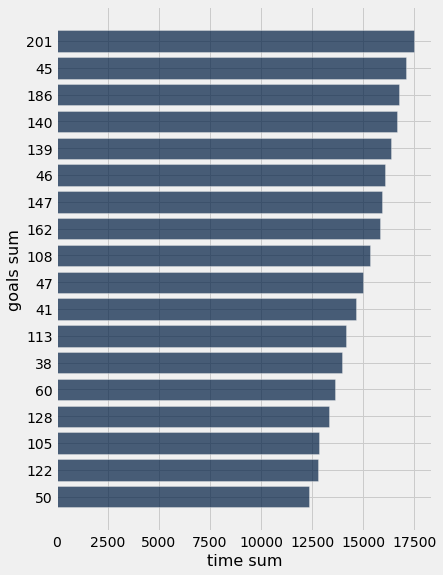

In [ ]:
Platform_GlobalSales_BarChart = NewGlobalSales_count.sort('time sum', descending = True).barh("goals sum", "time sum")

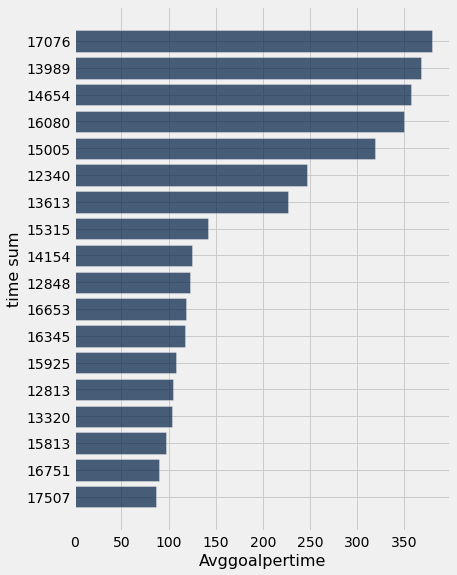

In [ ]:
Extended_GlobalSales_Platform_count_BarChart = Extended_GlobalSales_count.sort('Avggoalpertime', descending = True).barh("time sum", "Avggoalpertime")

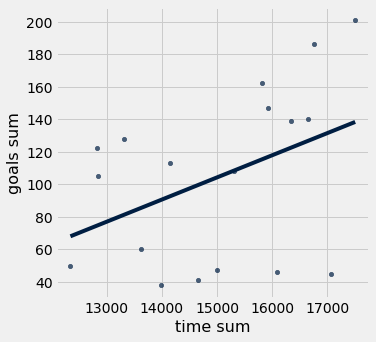

In [ ]:
NewGlobalSales_count.scatter('time sum', 'goals sum', fit_line = True)

From this scatter we can see it looks like a line or positive portion which means more time makes more goals

This show the scatter of goal per time and total times for players


In [ ]:
Extended_GlobalSales_count.scatter('time sum', 'Avggoalpertime', fit_line = True)

From this scatter we can see it all most like more time the goal per time data will be lower. But not for all, it is not like the portion relationship.

# **The Relationship Between Assists and Times**


**We judge players not only on goals, but also on assists**

Here is the assists for each player in each years

In [ ]:
playerassist = Newallplayer.select('player_name', 'assists')
playerassist.sort('assists', descending = True)

player_name       | assists
Lionel Messi      | 20
Kevin De Bruyne   | 20
Kevin De Bruyne   | 20
Thomas Müller     | 20
Lionel Messi      | 18
Kevin De Bruyne   | 18
Ángel Di María    | 18
Lionel Messi      | 16
Cristiano Ronaldo | 16
Luis Suárez       | 16
... (104 rows omitted)

Now we will count them into a total data for 5 years

In [ ]:
Totalplayerassist = playerassist.group('player_name', collect=sum)
Totalplayerassist.sort('assists sum', descending = True).show()

In [ ]:
Totalplayerassist.stats()

statistic | player_name     | assists sum
min       | Alejandro Gomez | 20
max       | Ángel Di María  | 88
median    |                 | 55
sum       |                 | 913

From these data we can see there is a little bit different in rank than the data for goals for player

Now we put times and assist data together

In [ ]:
assistlist = Totalplayerassist.join('player_name',NewTotalalltime)
assistlist.sort('assists sum', descending = True).show()


We are going to find the relationship between assists and times

In [ ]:
Avgassistspertime = assistlist.apply(lambda x, y: x/y, "time sum", "assists sum")
Avgassistspertime

array([ 287.14285714,  304.92857143,  471.8       ,  328.45098039,
        259.05555556,  244.23333333,  582.40909091,  832.65      ,
        176.52941176,  198.94318182,  230.79710145,  319.0625    ,
        229.42857143,  583.75      ,  632.52      ,  444.        ,
        197.28985507,  186.96969697])

In [ ]:
Extended_assistlist = assistlist.with_column("Avgassistspertime", Avgassistspertime)
Extended_assistlist.sort("Avgassistspertime", descending = True).show()

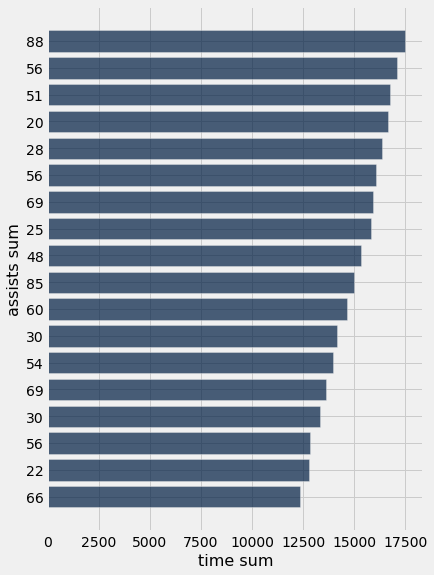

In [ ]:
Platform_GlobalSales_BarChart = assistlist.sort('time sum', descending = True).barh("assists sum", "time sum")

In [ ]:
Extended_assistlist_Platform_count_BarChart = Extended_assistlist.sort('Avgassistspertime', descending = True).barh("time sum", "Avgassistspertime")

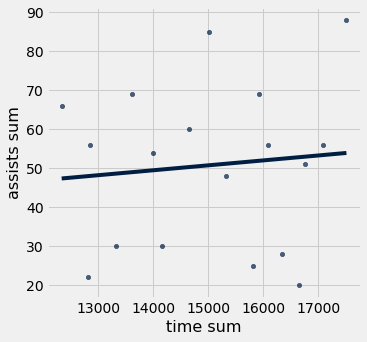

In [ ]:
assistlist.scatter('time sum', 'assists sum', fit_line = True)

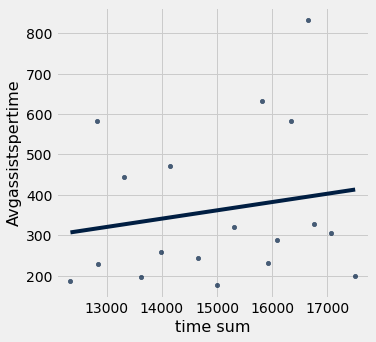

In [ ]:
Extended_assistlist.scatter('time sum', 'Avgassistspertime', fit_line = True)

According to these 2 graph, we can see the relationship is similar as it for Goals.

# **To make a decsion tree**

In [ ]:
Ben_data = pd.read_table(path2, sep=",")

In [ ]:
X1 = Ben_data.values[:,4:10]
print(X1)

[[25 20.84966728 20 16.59336339 159 88]
 [36 25.99716907 13 15.33516552 170 93]
 [34 28.94628061 12 15.10040562 196 87]
 [37 26.88517436 9 13.9551314 179 79]
 [26 27.10191032 16 15.87127814 158 77]
 [43 35.89176358 18 17.61195552 187 95]
 [31 29.43167947 5 6.067225832 208 51]
 [21 23.3240399 8 5.193873834 175 48]
 [26 26.99930358 5 5.524841644 178 40]
 [25 25.41373776 6 4.591035931 162 31]
 [35 35.58900645 11 8.606404347 227 51]
 [48 39.30876068 16 13.60064235 225 76]
 [34 31.19676423 4 7.271124899 138 36]
 [22 33.14324214 7 9.613417827 144 47]
 [29 27.89581551 2 2.390443827 127 22]
 [30 30.09775198 5 5.55053949 143 30]
 [30 28.46237727 2 3.455625979 152 22]
 [17 17.72218335 5 4.644012805 104 32]
 [16 13.9139645 8 3.169745293 79 26]
 [21 24.394436 6 7.323390704 112 47]
 [25 25.36798 12 11.14468303 121 56]
 [29 23.7806455 13 11.03960339 120 62]
 [40 35.83373058 16 13.2759628 137 56]
 [16 14.54230952 14 13.52065751 75 60]
 [18 13.29706595 2 3.117006309 82 27]
 [17 16.12239446 4 4.5626632

In [ ]:
Y= Ben_data.values[:, 4]
print(Y)

[25 36 34 37 26 43 31 21 26 25 35 48 34 22 29 30 30 17 16 21 25 29 40 16 18
 17 30 29 25 21 22 22 10 13 31 25 16 16 21 21 20 24 26 4 18 28 35 19 18 36
 15 29 23 2 5 3 19 22 32 15 14 0 6 14 2 8 6 7 0 10 8 6 8 5 20 13 8 12 11 6
 10 3 9 4 6 2 4 9 7 12 15 19 13 24 22 7 7 6 16 7 3 2 1 8 10 8 6 10 5 6 9 4
 2 12]


In [ ]:
Y=Y.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y, test_size = 0.25, random_state = 100)

In [ ]:
print(y_train)

[25 22 40 16  5  7 25  8 31 37 34 29  8 13  5  6  0 20  6 20  2 26  2 12 17
  6 10  3  3 25 16 18 21 28 21 11 10 22 19 12  1 14 21 15  6  3  7  0  8 19
 36 21  4 15  7  4 22 36 22 26 29 34  4 25 30 32 14 30  2 31 29  9  6  2 16
 23 22 35 18  6  9  8  7 18 26]


## Train a Decision Tree

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 100,
                               max_depth= 4, min_samples_leaf= 2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       random_state=100)

In [ ]:
dot_data= tree.export_graphviz(clf, out_file=None, feature_names=('goals','xG','assists','xA','shots',"key_passes"))


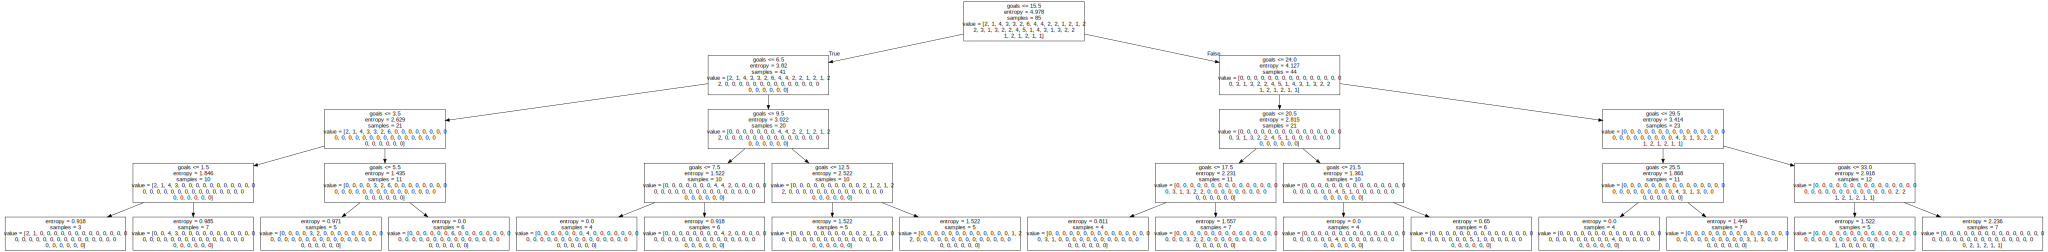

In [ ]:
graph = graphviz.Source(dot_data)
graph

**Save the tree**

In [ ]:
path3='/content/drive/My Drive/DS200Labs/Projectdata/bestplayerTree'
graph.render(path3)

'/content/drive/My Drive/DS200Labs/Projectdata/bestplayerTree.pdf'

According to the tree we can see the data still larger than 1 which means we need put more details in it.

And now we need to improve our data and update the tree

In [ ]:
predicted_completion = clf.predict(X_test)

In [ ]:
print(predicted_completion)

[ 7  6  4 30 10 10  6 21  4 26 22 10 14 16  8 18  8 34 14  8 16 10 34  2 34
 25 22 14 16]


In [ ]:
print(y_test)

[ 7  6  5 30 10 10  6 21  4 29 24 12 15 17  9 19  8 35 13  8 16 10 43  2 48
 25 24 13 16]


In [ ]:
np.mean(predicted_completion == y_test)

0.51724137931034486

In [ ]:
print(metrics.classification_report(y_test, predicted_completion))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       0.67      1.00      0.80         2
           9       0.00      0.00      0.00         1
          10       0.75      1.00      0.86         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.67      1.00      0.80         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          21       1.00      1.00      1.00         1
          22       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

# **Conclusion**
1. I made the data smaller and compared the top 10 players in goals and assists, which allowed us to filter out the people who didn't get to vote for the best player. Because some players were in the top 10 in both assists and goals, we ended up with 18 players
2. The data is also not that perfect, like i just notice, somethimes we will see the player not played 5 or 10 minutes, but get a goal or a assist, that will make them have a high rank, so that i will improveon like, maybe i will delete some player's data which only played few times, so that it can make the data shows more logic.
3. I will make more data to show the ability of a player, at last i will make a standard to compare those player to make a reasonble rank.
4. To make the results statistical, we changed our need to find the best player to the best attacker, which means we will mainly consider his offensive ability, such as his goals, assists and so on
5. The current decision tree is still not at its best, and I will continue to revise it

# **Data Cleaning**

**Encoded and cleaned data from both relationship analyses.**

In [ ]:
Extended_assistlist = assistlist.with_column("Avgassistspertime", Avgassistspertime)
Extended_assistlist.sort("Avgassistspertime", descending = True).show()

In [ ]:
Extended_GlobalSales_count = NewGlobalSales_count.with_column("Avggoalpertime", Avggoalpertime)
Extended_GlobalSales_count.sort("Avggoalpertime", descending = True).show()

There was no missing data, but the data did have to be heavily sorted and organized to calculate the desired variables shown above. There are no apparent discrepancies or errrors in the data set, so it was not necessary to describe or deal with any missing data.